# Titanic - Machine Learning from Disaster

## Probelem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Statement Analysis
* Supervised Machine Learning Problem.
* The Target Value is **Survived**.

## Goal
Using this model, We will try to understand what sort of people were more likely to **survive** than others.

# Hypothesis Generation
* Females have more chance of surviving.
* Children have more chance of surviving.
* Upper Class (VIPS) have more chance of surviving.
* People with less siblings have more chance of surviving.
* Person with no family/sibings have more chance of surviving.
* Swimmers have more chance of surviving.



# Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os # Path to file
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt # Data visulization
import seaborn as sns  # Data visulization
import warnings # warning filter
%matplotlib inline
sns.set(style="darkgrid")


In [2]:

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# Loading Data.
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')


In [4]:
# lets check data
print(f'Train Dataset (row, col): {train.shape} \n')
print('\nTrain Dataset Information:\n')
print(train.info())

print(f'\nTest Dataset (row, col): {test.shape} \n')
print('\nTest Dataset Information:\n')
print(test.info())

print('\nTrain Dataset Values:\n')
train.apply(lambda x:x.unique())


Train Dataset (row, col): (891, 12) 


Train Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Dataset (row, col): (418, 11) 


Test Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Survived                                                  [0, 1]
Pclass                                                 [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex                                               [male, female]
Age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                      [1, 0, 3, 4, 2, 5, 8]
Parch                                      [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Cabin          [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked                                          [S, C, Q, nan]
dtype: object

## About Dataset

This dataset is named Titanic Survival. The dataset contains a set of **891** records under **12** attributes:

## Column Name and their Description

* **PassengerId**: Unique passenger ID.
* **Name** : name of passenger.
* **Pclass** : Ticket class (A proxy for **socio-economic status** (SES)).
* **Sex** : gender of passenger.
* **Age** : age of passenger.
* **SibSp**: number of siblings/spouse of passenger.
* **Parch** : number of parents of passenger.
* **Ticket** : ticket number.
* **Fare** :Passenger fare.
* **Cabin** : Cabin number.
* **Embarked** : Port of Embarkation.

## Variable Notes
**Pclass**: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
* **Sibling** = brother, sister, stepbrother, stepsister
* **Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
* **Parent** = mother, father
* **Child** = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore **parch=0** for them.


# Data Analysis
Lets combine both datasets since both are similier

In [5]:
# Combining Datasets
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print('After combining the datasets: ', data.shape)

After combining the datasets:  (1309, 13)


In [6]:
# Check Dupicates
data.drop_duplicates(inplace=True)

In [7]:
# Data Summery
data.describe(include=[object, np.number])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,2
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,train
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,891
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN


### Observations
* Average pessanger's age is almost **30**.
* Average pessanger's Pclass is **Middle Class**.
* Most pessangers are **Male**.
* Most pessangers have **single sibings/spouse**.
* Most pessangers are **single travelers**.
* Average Fare is **33$**.


# Data Exploration
Below are the steps involved to understand, clean and prepare your data for building your predictive model:

* Missing values treatment
* Variable Identification
* Univariate Analysis
* Bi-variate Analysis
* Outlier treatment
* Variable transformation
* Variable creation

* ### Missing Values

In [8]:
# Missing values
(data.isnull().sum()/data.shape[0]) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
source          0.000000
dtype: float64

* Age has **20%** missing values.
* Cabin has **77%** missing values.

<AxesSubplot:xlabel='Age', ylabel='Count'>

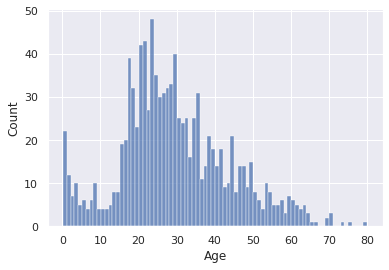

In [9]:
# Lets Impute missing values

# Age is numeric
# ax = sns.boxplot(data=data, x='Age')
# plt.title('Age Box Plot')

sns.histplot(data=data, x=data['Age'], bins=80)

### Observations
* Age is slightly **positive skewed** and after age of 66 all are  **outliers**.

### Outlier Detection Method
* Boxplot
* Z-score
* IQR

### Handling Outliers

1. Quantile based flooring and capping
2. Mean/Median/Mode
3. Removing (not recommended)

<AxesSubplot:xlabel='Age', ylabel='Count'>

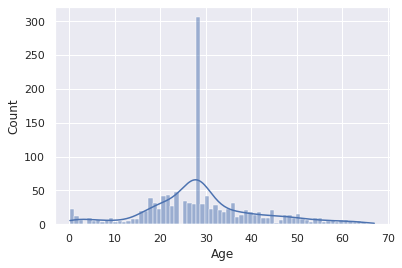

In [10]:
# Lets imputate missing value with median
data[data['Age'] >= 70] = np.nan
data['Age'] = data['Age'].fillna(np.nanmedian(data.Age))
sns.histplot(data=data, x=data['Age'], bins=70, kde=True)